In [1]:
#### 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/실습데이터.csv') 

In [3]:
df1 = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/raw_total_data.csv')

In [4]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

In [5]:
columns_to_drop = [
    'KO6_MOTOR_SET_FREQ.xlsx', 'KO6_MOTOR_CURR.xlsx', 'KO6_MOTOR_INVERTER_ALM.xlsx',
    'TRANS_POS_LEFT.xlsx', 'TRANS_POS_RIGHT.xlsx', 'TRANS_POS_UP.xlsx', 'TRANS_POS_DOWN.xlsx',
    'TRANS_POS_LEFT_SET_H.xlsx', 'TRANS_POS_RIGHT_SET_H.xlsx', 'TRANS_POS_UP_SET_H.xlsx', 'TRANS_POS_DOWN_SET_H.xlsx',
    'TRANS_POS_LEFT_SET_L.xlsx', 'TRANS_POS_RIGHT_SET_L.xlsx', 'TRANS_POS_UP_SET_L.xlsx', 'TRANS_POS_DOWN_SET_L.xlsx'
]

df1 = df1.drop(columns=columns_to_drop, errors='ignore')

In [6]:
# 'Main Motor'라는 문자열이 컬럼명에 포함된 컬럼만 추출
main_motor_columns = [col for col in df.columns if 'MAIN_MOTOR' in col]

# 해당 컬럼들의 데이터만 추출
main_motor_data = df[main_motor_columns]

# 결과 확인
print(main_motor_data.head())  # 또는 display(main_motor_data) in Jupyter

   MAIN_MOTOR_CURR.xlsx  MAIN_MOTOR_RPM.xlsx  MAIN_MOTOR_SET_FREQ.xlsx  \
0                2192.5               8524.0                    2166.5   
1                4108.0               8524.0                    2166.5   
2                4158.0               8524.0                    2166.5   
3                4118.0               8524.0                    2166.5   
4                4063.0               8524.0                    2166.5   

   MAIN_MOTOR_ALM.xlsx  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  


In [7]:
import pandas as pd
# 컬럼명 앞뒤 공백 제거
df.columns = df.columns.str.strip()

# 효율성 계산
df['EFFICIENCY'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_SET_FREQ.xlsx']

# IQR 방식으로 "정상 범위" 산출
Q1 = df['EFFICIENCY'].quantile(0.25)
Q3 = df['EFFICIENCY'].quantile(0.75)
IQR = Q3 - Q1

# 정상 범위 계산 (이상치 탐지 X, 단순 구간 산출용)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 출력
print(f"✅ 정상 효율 범위 (IQR 기준): {round(lower_bound, 3)} ~ {round(upper_bound, 3)}")

# 참고로 분포 확인 (선택)
# print(df['EFFICIENCY'].describe())

✅ 정상 효율 범위 (IQR 기준): 2.999 ~ 3.001


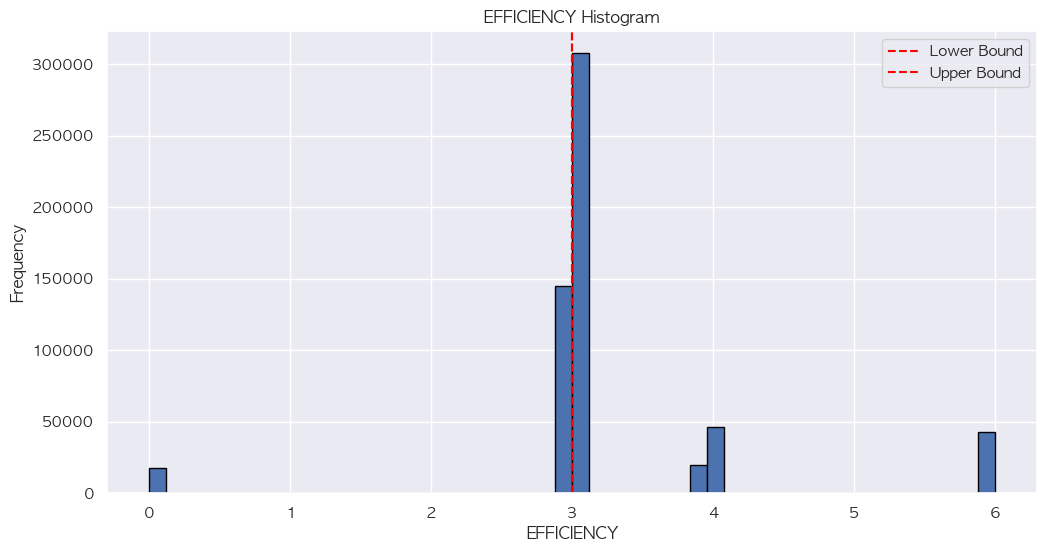

In [8]:
import matplotlib.pyplot as plt

plt.hist(df['EFFICIENCY'], bins=50, edgecolor='black')
plt.axvline(x=2.999, color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=3.001, color='red', linestyle='--', label='Upper Bound')
plt.title('EFFICIENCY Histogram')
plt.xlabel('EFFICIENCY')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 정상구간 먼저 설정
import pandas as pd

# 효율성 계산: RPM / SET_FREQ
df['EFFICIENCY'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_SET_FREQ.xlsx']

# IQR 계산
Q1 = df['EFFICIENCY'].quantile(0.25)
Q3 = df['EFFICIENCY'].quantile(0.75)
IQR = Q3 - Q1

# 정상 구간 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 여부 판단
df['IS_ABNORMAL'] = ~df['EFFICIENCY'].between(lower_bound, upper_bound)

# 결과 출력
print("정상 효율 범위:", round(lower_bound, 2), "~", round(upper_bound, 2))
print(df[['MAIN_MOTOR_RPM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'EFFICIENCY', 'IS_ABNORMAL']].head())

# (선택) 이상치만 따로 보기
abnormal_df = df[df['IS_ABNORMAL']]
print("\n이상치 데이터 개수:", len(abnormal_df))

정상 효율 범위: 3.0 ~ 3.0
   MAIN_MOTOR_RPM.xlsx  MAIN_MOTOR_SET_FREQ.xlsx  EFFICIENCY  IS_ABNORMAL
0               8524.0                    2166.5    3.934456         True
1               8524.0                    2166.5    3.934456         True
2               8524.0                    2166.5    3.934456         True
3               8524.0                    2166.5    3.934456         True
4               8524.0                    2166.5    3.934456         True

이상치 데이터 개수: 230148


### 정상범위를 먼저 구하고, 정상범위와의 차이로 효율을 구분을 하려고 했으나 => 두 컬럼의 값이 일정한 값이라, 정상범위가 거의 3으로 나옴. -> 무의미.

## 1. 효율성: RPM(회전 속도)/Freq(주파수): 설정 주파수당 얼마나 회전 하는가?

count    579290.000000
mean          3.237983
std           0.997245
min           0.000000
25%           2.999654
50%           3.000000
75%           3.000000
max           6.000000
Name: EFFICIENCY, dtype: float64


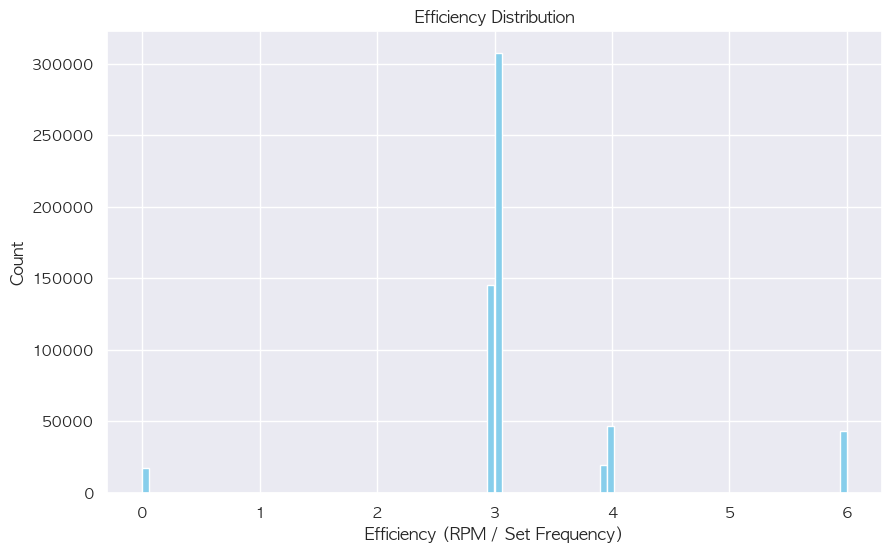

In [10]:
import pandas as pd

# 예시: 이미 데이터프레임 df에 데이터가 있다고 가정

# 효율 컬럼 생성
df['EFFICIENCY'] = df['MAIN_MOTOR_RPM.xlsx'] / df['MAIN_MOTOR_SET_FREQ.xlsx']

# 기본 통계 확인
print(df['EFFICIENCY'].describe())

# 효율 분포 시각화 (선택)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['EFFICIENCY'].dropna(), bins=100, color='skyblue')
plt.title('Efficiency Distribution')
plt.xlabel('Efficiency (RPM / Set Frequency)')
plt.ylabel('Count')
plt.show()

- 효율 값이 3인 구간에 데이터가 많다는 건 그 구간이 대표적인 운전 상태일 가능성이 크다.(모터가 설정 주파수 대비 RPM이 3배 가까이 나온다는 뜻)
- 정상 범위인지 확인 필요 (설비 스펙, 기술문서 참고)
- 0 또는 이상치 값이 포함되어 왜곡된 건 아닌지 점검 필요
- => 정상수치: 2.999~3.001 : 효율 값이 거의 3에 집중(설비가 아주 일정하고 안정적으로 운영되고 있다는 강력한 신호/ 변동이 거의 없어서 IQR(사분위 범위)이 매우 좁음.)

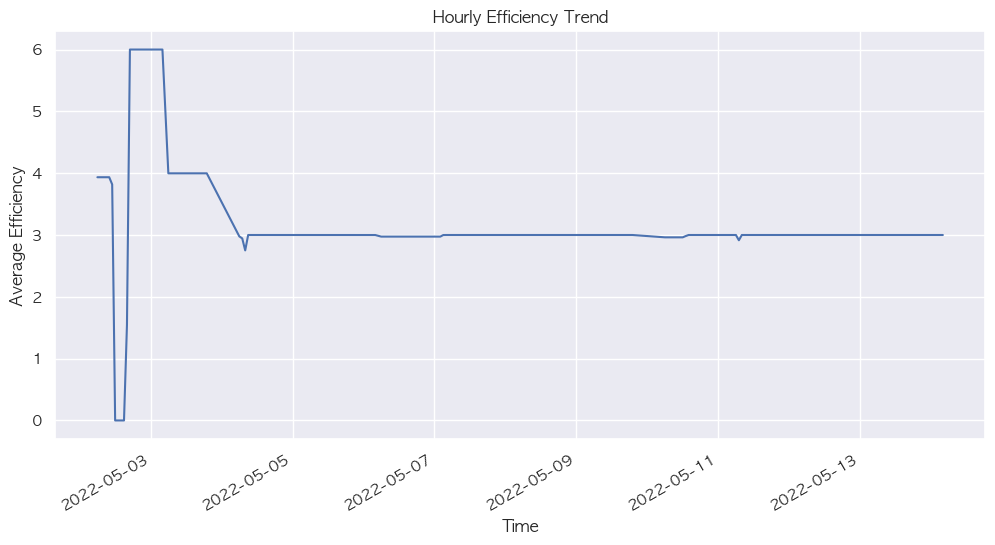

In [11]:
## 2. 시간대별 효율 변화 추이
# 예시: 'Timestamp' 컬럼이 datetime 형식이라고 가정
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 시간별 평균 효율 계산
efficiency_hourly = df.groupby(df['Timestamp'].dt.floor('H'))['EFFICIENCY'].mean()

# 시계열 그래프 그리기
plt.figure(figsize=(12,6))
efficiency_hourly.plot()
plt.title('Hourly Efficiency Trend')
plt.xlabel('Time')
plt.ylabel('Average Efficiency')
plt.show()

In [12]:
# 4.설정 주파수 대비 RPM 차이가 큰 구간 탐지 
#* 효율 값이 너무 크거나 너무 작은 구간을 이상 구간으로 판단
# IQR 기준 이상치 탐지
Q1 = df['EFFICIENCY'].quantile(0.25)
Q3 = df['EFFICIENCY'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

anomalies = df[(df['EFFICIENCY'] < lower_bound) | (df['EFFICIENCY'] > upper_bound)]

print(f"이상치 구간 수: {len(anomalies)}")
print(anomalies[['Timestamp', 'EFFICIENCY', 'MAIN_MOTOR_RPM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx']].head())

이상치 구간 수: 230141
            Timestamp  EFFICIENCY  MAIN_MOTOR_RPM.xlsx  \
0 2022-05-02 06:32:33    3.934456               8524.0   
1 2022-05-02 06:32:34    3.934456               8524.0   
2 2022-05-02 06:32:35    3.934456               8524.0   
3 2022-05-02 06:32:36    3.934456               8524.0   
4 2022-05-02 06:32:37    3.934456               8524.0   

   MAIN_MOTOR_SET_FREQ.xlsx  
0                    2166.5  
1                    2166.5  
2                    2166.5  
3                    2166.5  
4                    2166.5  


=> 이상치 구간 수 너무 많음.(40%이상) IQR기준으로 계산한 정상 범위가 너무 좁게 정의되었을 가능성.

완화된 정상 범위 내 데이터 개수: 518535
완화된 정상 범위 밖 데이터 개수: 60755


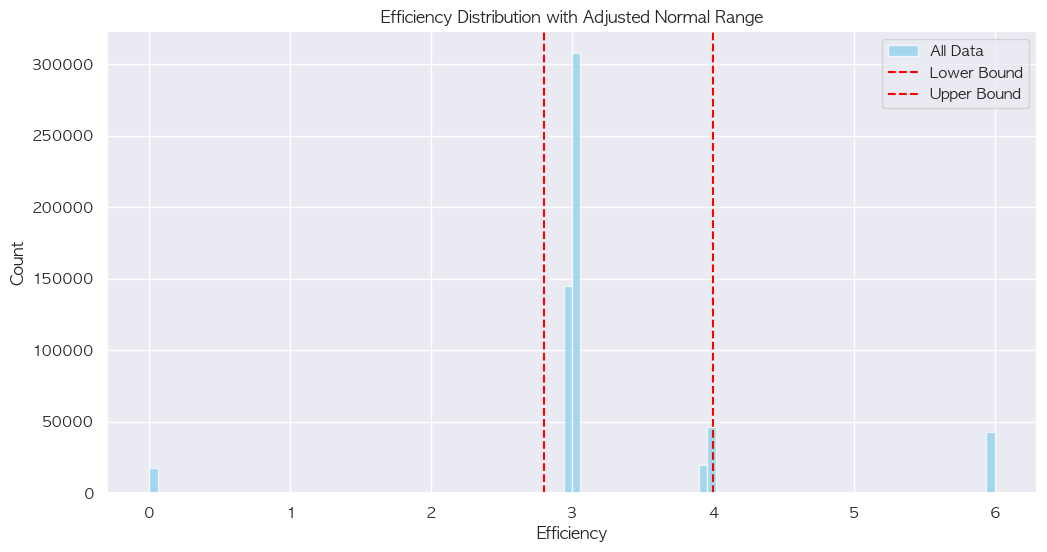

In [13]:
# 정상 범위 완화 예시 (도메인 지식 기반)
lower_bound = 2.8
upper_bound = 4.0

normal_range = df[(df['EFFICIENCY'] >= lower_bound) & (df['EFFICIENCY'] <= upper_bound)]
outliers = df[(df['EFFICIENCY'] < lower_bound) | (df['EFFICIENCY'] > upper_bound)]

print(f'완화된 정상 범위 내 데이터 개수: {len(normal_range)}')
print(f'완화된 정상 범위 밖 데이터 개수: {len(outliers)}')

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.hist(df['EFFICIENCY'].dropna(), bins=100, color='skyblue', alpha=0.7, label='All Data')
plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.title('Efficiency Distribution with Adjusted Normal Range')
plt.xlabel('Efficiency')
plt.ylabel('Count')
plt.legend()
plt.show()

## 1단계. 이상치(범위 밖 데이터) 분석 — 시간, 알람, 생산량 확인

이상치 개수: 60755


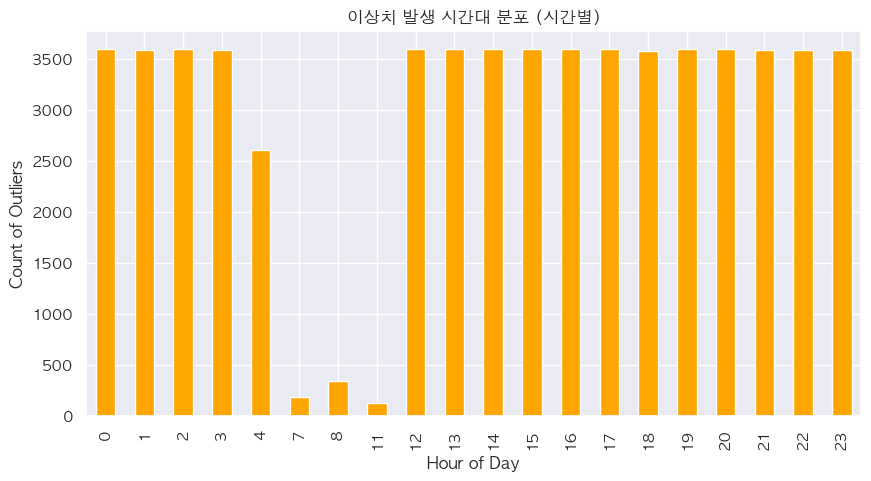

이상치 구간 알람 발생 비율: 0.00%
이상치 구간 평균 생산량: 32333.072973417824


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 정상 범위 재설정 (완화된 범위)
lower_bound = 2.8
upper_bound = 4.0

# 이상치 데이터 추출
outliers = df[(df['EFFICIENCY'] < lower_bound) | (df['EFFICIENCY'] > upper_bound)].copy()

print(f"이상치 개수: {len(outliers)}")

# 이상치가 발생한 시간대 분포 확인
outliers['Hour'] = outliers['Timestamp'].dt.hour
plt.figure(figsize=(10,5))
outliers['Hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('이상치 발생 시간대 분포 (시간별)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Outliers')
plt.show()

# 알람 컬럼명 예시 (실제 컬럼명으로 교체)
alarm_col = 'MAIN_MOTOR_ALM.xlsx'

if alarm_col in outliers.columns:
    alarm_rate = outliers[alarm_col].mean()
    print(f"이상치 구간 알람 발생 비율: {alarm_rate:.2%}")
else:
    print(f"'{alarm_col}' 컬럼이 이상치 데이터에 없습니다.")

# 생산량 컬럼명 예시 (실제 컬럼명으로 교체)
output_col = 'OUTPUT_COUNT_DAY_1.xlsx'

if output_col in outliers.columns:
    avg_output = outliers[output_col].mean()
    print(f"이상치 구간 평균 생산량: {avg_output}")
else:
    print(f"'{output_col}' 컬럼이 이상치 데이터에 없습니다.")

### 이상치 구간 알람 발생 비율이 0.00%
→ 이상치(효율 값이 2.8~4.0 범위를 벗어난 구간)에서 알람은 전혀 발생하지 않았음.
→ 즉, 효율 변화가 크더라도 장비 이상 신호(알람)와는 무관할 가능성이 큼.

### 이상치 구간 평균 생산량이 32,333 정도
→ 이상치 구간에서도 생산량은 상당히 높은 수준.
→ 즉, 효율 값이 정상 범위를 벗어나도 생산에는 크게 지장이 없거나, 오히려 생산이 활발할 때도 효율 값이 변동할 수 있음.

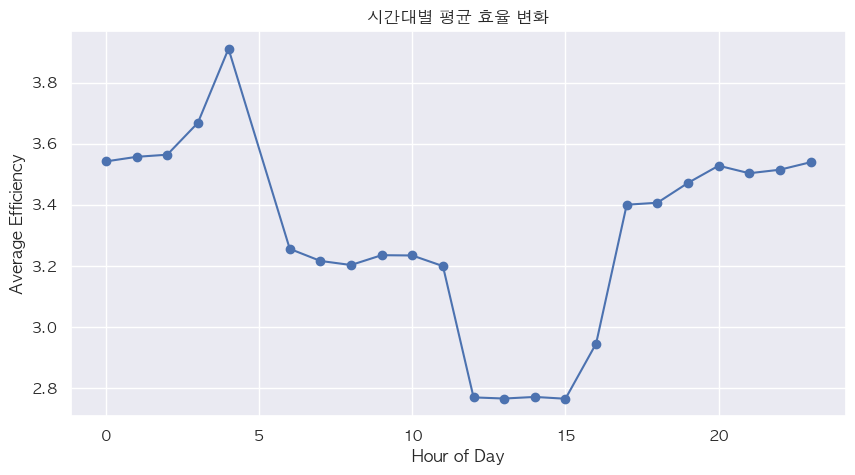

In [15]:
# 2단계. 시간별 평균 효율 계산
df['Hour'] = df['Timestamp'].dt.hour
efficiency_hourly = df.groupby('Hour')['EFFICIENCY'].mean()

plt.figure(figsize=(10,5))
efficiency_hourly.plot(marker='o')
plt.title('시간대별 평균 효율 변화')
plt.xlabel('Hour of Day')
plt.ylabel('Average Efficiency')
plt.grid(True)
plt.show()

In [16]:
# 모든 컬럼명 출력
print(df.columns.tolist())

['Timestamp', 'OUTPUT_COUNT_DAY_1.xlsx', 'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx', 'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx', 'KO3_MOTOR_CURR.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO4_MOTOR_CURR.xlsx', 'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'MAIN_AIR_PRESS.xlsx', 'TRANS_SET_FREQ.xlsx', 'METAL_TEMP_CUT.xlsx', 'KO5_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'OIL_PRESS_LEVEL_ALM.xlsx', 'CUTTING_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO1_

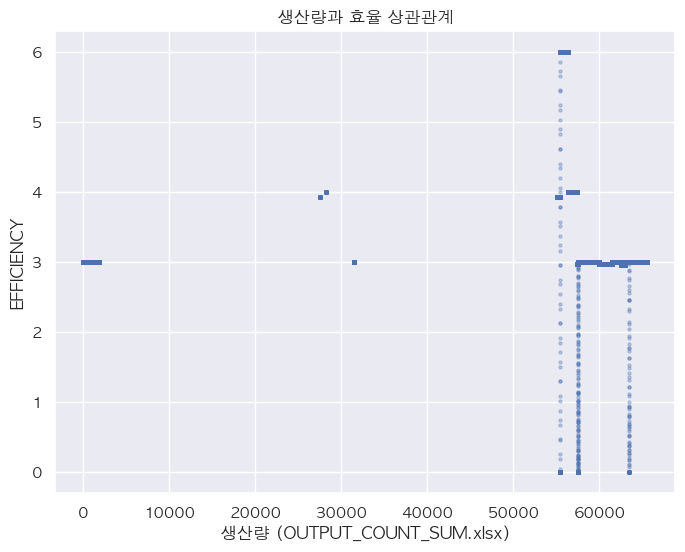

생산량과 효율 간 상관계수: 0.009


In [17]:
# 3단계.생산량 컬럼명
output_col = 'OUTPUT_COUNT_SUM.xlsx'

if output_col in df.columns:
    plt.figure(figsize=(8,6))
    plt.scatter(df[output_col], df['EFFICIENCY'], alpha=0.3, s=5)
    plt.title('생산량과 효율 상관관계')
    plt.xlabel('생산량 (OUTPUT_COUNT_SUM.xlsx)')
    plt.ylabel('EFFICIENCY')
    plt.show()

    # 상관계수 계산
    corr = df[[output_col, 'EFFICIENCY']].corr().iloc[0,1]
    print(f'생산량과 효율 간 상관계수: {corr:.3f}')
else:
    print(f"'{output_col}' 컬럼이 데이터에 없습니다.")

- 결론: 회전속도 RPM과 주파수는 강한 양의 상관관계가 있었지만,
그 둘이 효율성(EFFICIENCY)에 영향을 미치지는 않았음. -> 값이 일정해서

In [18]:
# Step 1: 효율 변화량 계산
df['EFFICIENCY_DIFF'] = df['EFFICIENCY'].diff().abs()

# Step 2: 변화량 상위 5% 이상인 경우만 '급변'으로 정의
threshold = df['EFFICIENCY_DIFF'].quantile(0.95)
change_df = df[df['EFFICIENCY_DIFF'] > threshold]
stable_df = df[df['EFFICIENCY_DIFF'] <= threshold]

# Step 3: 생산량 평균 비교
output_col = 'OUTPUT_COUNT_SUM.xlsx'
change_mean = change_df[output_col].mean()
stable_mean = stable_df[output_col].mean()

print(f"▶ 효율 급변 구간 평균 생산량: {change_mean:,.2f}")
print(f"▶ 안정 구간 평균 생산량: {stable_mean:,.2f}")
print(f"▶ 변화량 기준 threshold: {threshold:.4f}")

▶ 효율 급변 구간 평균 생산량: 58,428.32
▶ 안정 구간 평균 생산량: 55,513.96
▶ 변화량 기준 threshold: 0.0000


In [19]:
# 효율성 컬럼과 나머지 수치형 컬럼 간 상관관계 분석
correlations = df.corr(numeric_only=True)['EFFICIENCY'].sort_values(ascending=False)
print(correlations)

EFFICIENCY                           1.000000
MAIN_MOTOR_CURR.xlsx                 0.422251
MAIN_MOTOR_RPM.xlsx                  0.354846
IS_ABNORMAL                          0.293987
STATUS.xlsx                          0.257700
TONGS_CAST_CURR.xlsx                 0.219118
METAL_TEMP_CUT.xlsx                  0.047325
TONGS_CAST_SET_FREQ.xlsx             0.045725
METAL_TEMP_CONTROL.xlsx              0.021290
OUTPUT_COUNT_SUM.xlsx                0.009195
OUTPUT_COUNT_DAY_1.xlsx             -0.003718
OUTPUT_COUNT_DAY_2.xlsx             -0.003730
MAIN_AIR_PRESS.xlsx                 -0.015086
EFFICIENCY_DIFF                     -0.015222
Hour                                -0.028287
MAIN_MOTOR_ALM.xlsx                 -0.086470
KO1_MOTOR_INVERTER_ALM.xlsx         -0.086492
CUTTING_INVERTER_ALM_ERR_CD.xlsx    -0.086503
METAL_OIL_SUPPLY_PRESS_CUT.xlsx     -0.093823
METAL_OIL_SUPPLY_PRESS_CONTR.xlsx   -0.102426
OIL_SUPPLY_PRESS.xlsx               -0.177349
WORK_OIL_SUPPLY_PRESS.xlsx        

count    579290.000000
mean          3.237983
std           0.997245
min           0.000000
25%           2.999654
50%           3.000000
75%           3.000000
max           6.000000
Name: EFFICIENCY, dtype: float64


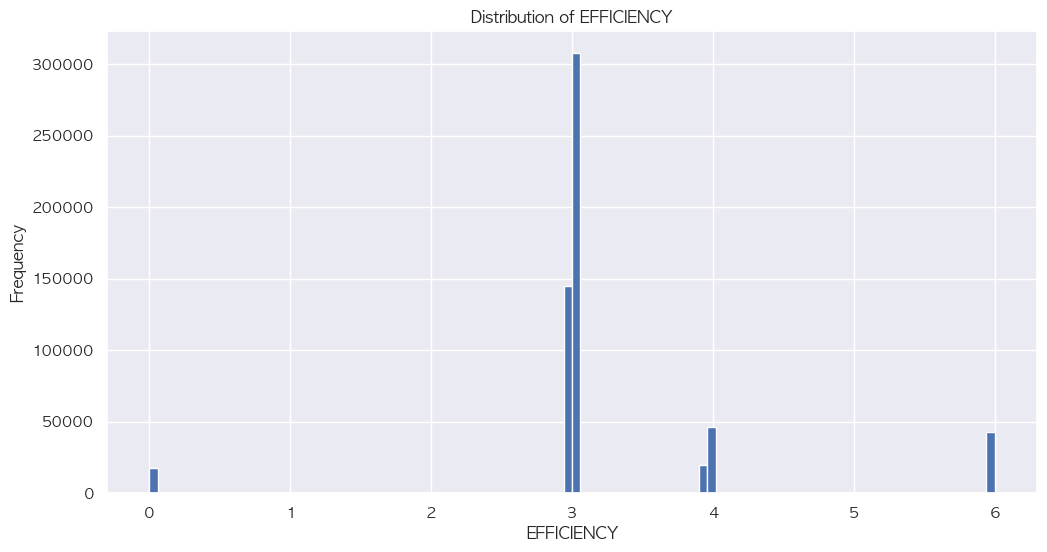

In [20]:
# 기본 통계 정보 확인
print(df['EFFICIENCY'].describe())

# 분포 시각화
import matplotlib.pyplot as plt

plt.hist(df['EFFICIENCY'].dropna(), bins=100)
plt.title("Distribution of EFFICIENCY")
plt.xlabel("EFFICIENCY")
plt.ylabel("Frequency")
plt.show()


In [21]:
# 숫자형 컬럼만 확인
numeric_cols = df.select_dtypes(include='number').columns.tolist()
print(numeric_cols)


['OUTPUT_COUNT_DAY_1.xlsx', 'CUTTING_SET_FREQ.xlsx', 'STATUS.xlsx', 'KO5_MOTOR_SET_FREQ.xlsx', 'METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'KO4_MOTOR_SET_FREQ.xlsx', 'KO2_MOTOR_SET_FREQ.xlsx', 'MAIN_MOTOR_CURR.xlsx', 'KO3_MOTOR_SET_FREQ.xlsx', 'TONGS_INVERTER_ALM_ERR_CD.xlsx', 'KO1_MOTOR_SET_FREQ.xlsx', 'KO3_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'TRANS_CURR.xlsx', 'KO1_MOTOR_CURR.xlsx', 'TRANS_INVERTER_ALM_ERR_CD.xlsx', 'TONGS_CAST_SET_FREQ.xlsx', 'KO4_MOTOR_INVERTER_ALM.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'KO2_MOTOR_INVERTER_ALM.xlsx', 'KO3_MOTOR_CURR.xlsx', 'TONGS_POS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'TONGS_CAST_CURR.xlsx', 'CUTTING_INVERTER_ALM_ERR_CD.xlsx', 'KO4_MOTOR_CURR.xlsx', 'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'MAIN_AIR_PRESS.xlsx', 'TRANS_SET_FREQ.xlsx', 'METAL_TEMP_CUT.xlsx', 'KO5_MOTOR_INVERTER_ALM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'OIL_PRESS_LEVEL_ALM.xlsx', 'CUTTING_CURR.xlsx', 'KO5_MOTOR_CURR.xlsx', 'KO2_MOTOR_CURR.xlsx', 'KO1_MOTOR_INVERTE

In [22]:
# 예시: EFF ≈ 생산량 / 전류
df['EFF_ESTIMATED'] = df['OUTPUT_COUNT_SUM.xlsx'] / df['MAIN_MOTOR_CURR.xlsx']
cor = df[['EFFICIENCY', 'EFF_ESTIMATED']].corr().iloc[0, 1]
print(f"Estimated Efficiency와 실제 EFFICIENCY의 상관계수: {cor:.4f}")

Estimated Efficiency와 실제 EFFICIENCY의 상관계수: -0.0105


In [23]:
# 다른 조합 테스트: 생산량 / RPM
df['EFF_EST_1'] = df['OUTPUT_COUNT_SUM.xlsx'] / df['MAIN_MOTOR_RPM.xlsx']
# 생산량 / 주파수
df['EFF_EST_2'] = df['OUTPUT_COUNT_SUM.xlsx'] / df['MAIN_MOTOR_SET_FREQ.xlsx']
# 생산량 / (전류 * 주파수)
df['EFF_EST_3'] = df['OUTPUT_COUNT_SUM.xlsx'] / (df['MAIN_MOTOR_CURR.xlsx'] * df['MAIN_MOTOR_SET_FREQ.xlsx'])

print(df[['EFFICIENCY', 'EFF_EST_1', 'EFF_EST_2', 'EFF_EST_3']].corr())

            EFFICIENCY  EFF_EST_1  EFF_EST_2  EFF_EST_3
EFFICIENCY    1.000000   0.037203   0.344383   0.525088
EFF_EST_1     0.037203   1.000000   0.620098   0.616019
EFF_EST_2     0.344383   0.620098   1.000000   0.908596
EFF_EST_3     0.525088   0.616019   0.908596   1.000000


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

features = ['MAIN_MOTOR_CURR.xlsx', 'MAIN_MOTOR_RPM.xlsx', 'MAIN_MOTOR_SET_FREQ.xlsx', 'TONGS_CAST_CURR.xlsx']
X = df[features].fillna(0)
y = df['EFFICIENCY'].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

# 결과
coefficients = pd.Series(model.coef_, index=features)
print("변수별 기여도 (회귀계수):")
print(coefficients.sort_values(ascending=False))

변수별 기여도 (회귀계수):
MAIN_MOTOR_RPM.xlsx         1.246224
MAIN_MOTOR_CURR.xlsx        0.001438
TONGS_CAST_CURR.xlsx        0.001123
MAIN_MOTOR_SET_FREQ.xlsx   -1.287901
dtype: float64


| 변수명                        | 회귀계수   | 해석                         |
| -------------------------- | ------ | -------------------------- |
| `MAIN_MOTOR_RPM.xlsx`      | 1.246  | RPM이 높아질수록 효율성이 크게 증가하는 영향 |
| `MAIN_MOTOR_SET_FREQ.xlsx` | -1.288 | 설정 주파수가 높아질수록 효율성은 감소하는 경향 |
| `MAIN_MOTOR_CURR.xlsx`     | 0.0014 | 전류는 효율성에 거의 영향을 주지 않는 수준   |
| `TONGS_CAST_CURR.xlsx`     | 0.0011 | 타 부하 전류 역시 영향 미미           |


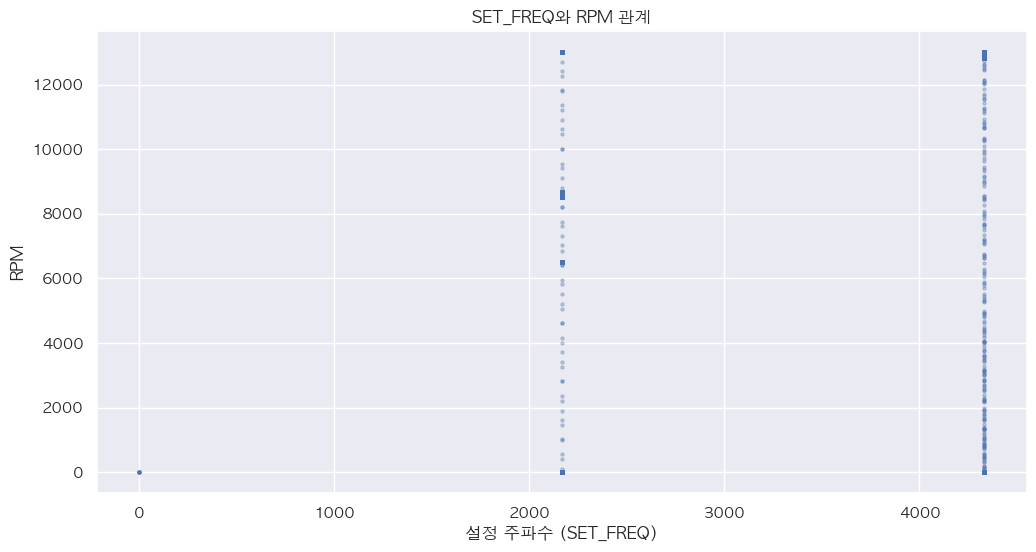

In [25]:
import matplotlib.pyplot as plt

plt.scatter(df['MAIN_MOTOR_SET_FREQ.xlsx'], df['MAIN_MOTOR_RPM.xlsx'], alpha=0.3, s=5)
plt.xlabel('설정 주파수 (SET_FREQ)')
plt.ylabel('RPM')
plt.title('SET_FREQ와 RPM 관계')
plt.grid(True)
plt.show()

MAIN_MOTOR_SET_FREQ.xlsx 값이 특정 구간(예: 2000Hz 근처, 4000Hz 근처)에서 집중적으로 분포하는 거예요.

MAIN_MOTOR_RPM.xlsx 값도 그 설정 주파수에 따라 일정 비율로 분포하고 있어서,
결과적으로 RPM / SET_FREQ가 거의 일정한 값(즉, 일직선)으로 나타나는 겁니다.

In [26]:
# 환경 및 설비 조건 관련 변수 리스트 추출 (예시 키워드로 필터링)
keywords = ['TEMP', 'PRESSURE', 'OIL', 'LUBRICANT', 'LUBE']

env_vars = [col for col in df.columns if any(k in col.upper() for k in keywords)]
print("환경/설비 변수들:", env_vars)

환경/설비 변수들: ['METAL_OIL_SUPPLY_PRESS_CONTR.xlsx', 'OIL_SUPPLY_PRESS.xlsx', 'WORK_OIL_SUPPLY_PRESS.xlsx', 'METAL_TEMP_CONTROL.xlsx', 'METAL_OIL_SUPPLY_PRESS_CUT.xlsx', 'METAL_TEMP_CUT.xlsx', 'OIL_PRESS_LEVEL_ALM.xlsx']


In [27]:
output_col = 'OUTPUT_COUNT_SUM.xlsx'

# 각 환경 변수와 생산량 간 상관계수 계산
corr_dict = {}
for var in env_vars:
    corr = df[[var, output_col]].corr().iloc[0,1]
    corr_dict[var] = corr

# 상관계수 높은 순서대로 정렬 및 출력
import operator
sorted_corr = dict(sorted(corr_dict.items(), key=operator.itemgetter(1), reverse=True))
print("생산량과 상관관계 높은 환경 변수:")
for k, v in sorted_corr.items():
    print(f"{k}: {v:.4f}")

생산량과 상관관계 높은 환경 변수:
OIL_SUPPLY_PRESS.xlsx: 0.0906
METAL_OIL_SUPPLY_PRESS_CONTR.xlsx: 0.0479
METAL_OIL_SUPPLY_PRESS_CUT.xlsx: 0.0338
WORK_OIL_SUPPLY_PRESS.xlsx: -0.0693
METAL_TEMP_CUT.xlsx: -0.2769
OIL_PRESS_LEVEL_ALM.xlsx: nan
METAL_TEMP_CONTROL.xlsx: -0.2808


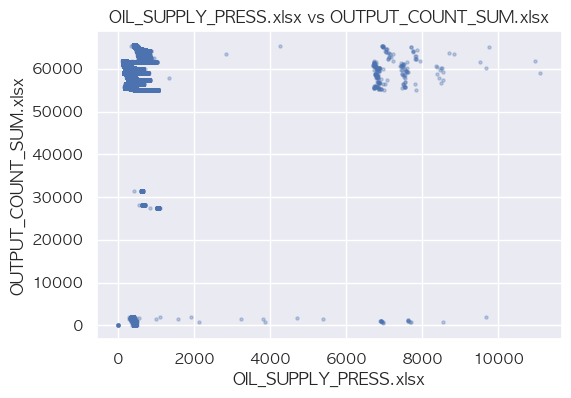

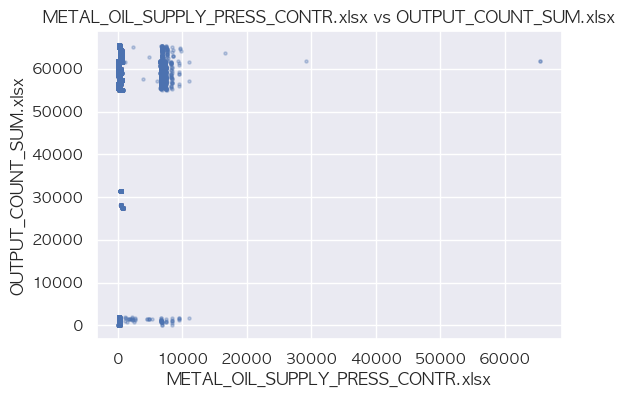

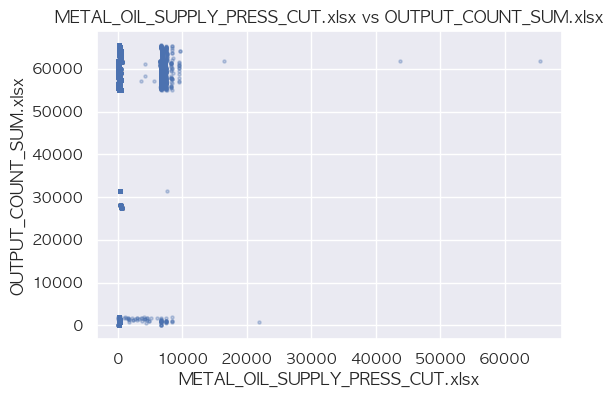

In [28]:
import matplotlib.pyplot as plt

top_vars = list(sorted_corr.keys())[:3]

for var in top_vars:
    plt.figure(figsize=(6,4))
    plt.scatter(df[var], df[output_col], alpha=0.3, s=5)
    plt.xlabel(var)
    plt.ylabel(output_col)
    plt.title(f"{var} vs {output_col}")
    plt.grid(True)
    plt.show()

In [29]:
import pandas as pd
import operator

output_col = 'OUTPUT_COUNT_SUM.xlsx'

# 숫자형 컬럼만 추출 (생산량 컬럼 포함)
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# 생산량 컬럼이 반드시 있어야 하므로 확인
if output_col not in numeric_cols:
    print(f"{output_col} 컬럼이 데이터에 없습니다.")
else:
    corr_dict = {}
    for col in numeric_cols:
        if col != output_col:
            corr = df[[col, output_col]].corr().iloc[0, 1]
            corr_dict[col] = corr

    # 상관계수 절댓값 기준 내림차순 정렬 (양수/음수 관계 모두 고려)
    sorted_corr = dict(sorted(corr_dict.items(), key=lambda item: abs(item[1]), reverse=True))

    print("생산량과 상관관계 높은 변수 Top 20:")
    for i, (col, corr) in enumerate(sorted_corr.items()):
        if i >= 20:
            break
        print(f"{col}: {corr:.4f}")

생산량과 상관관계 높은 변수 Top 20:
TRANS_CURR.xlsx: nan
KO1_MOTOR_CURR.xlsx: nan
KO3_MOTOR_CURR.xlsx: nan
KO4_MOTOR_CURR.xlsx: nan
OIL_PRESS_LEVEL_ALM.xlsx: nan
CUTTING_CURR.xlsx: nan
KO5_MOTOR_CURR.xlsx: nan
KO2_MOTOR_CURR.xlsx: nan
EFF_ESTIMATED: 0.8262
EFF_EST_2: 0.5832
EFF_EST_1: 0.5749
EFF_EST_3: 0.5537
METAL_TEMP_CONTROL.xlsx: -0.2808
METAL_TEMP_CUT.xlsx: -0.2769
MAIN_MOTOR_ALM.xlsx: 0.1146
KO1_MOTOR_INVERTER_ALM.xlsx: 0.1146
CUTTING_INVERTER_ALM_ERR_CD.xlsx: 0.1146
OIL_SUPPLY_PRESS.xlsx: 0.0906
TONGS_CAST_CURR.xlsx: 0.0879
TONGS_CAST_SET_FREQ.xlsx: -0.0847


In [30]:
#EFF_ESTIMATED (0.8262), EFF_EST_2 (0.5832), EFF_EST_1 (0.5749), EFF_EST_3 (0.5537)
#→ 앞서 만든 효율성 추정 지표들이 생산량과 높은 양의 상관관계

#온도 관련 변수인 METAL_TEMP_CONTROL.xlsx(-0.2808), METAL_TEMP_CUT.xlsx(-0.2769)
#→ 온도가 높을수록 생산량은 감소하는 경향

#알람 관련 변수 (MAIN_MOTOR_ALM.xlsx, KO1_MOTOR_INVERTER_ALM.xlsx 등)도 약한 양의 상관관계

| 지표명                | 정의 (계산식)                                                                    | 설명                             |
| ------------------ | --------------------------------------------------------------------------- | ------------------------------ |
| **EFF\_ESTIMATED** | `OUTPUT_COUNT_SUM.xlsx / MAIN_MOTOR_CURR.xlsx`                              | 생산량 대비 전류 사용 비율로 추정한 효율성       |
| **EFF\_EST\_1**    | `OUTPUT_COUNT_SUM.xlsx / MAIN_MOTOR_RPM.xlsx`                               | 생산량 대비 모터 회전수(RPM) 비율로 추정한 효율성 |
| **EFF\_EST\_2**    | `OUTPUT_COUNT_SUM.xlsx / MAIN_MOTOR_SET_FREQ.xlsx`                          | 생산량 대비 설정 주파수 비율로 추정한 효율성      |
| **EFF\_EST\_3**    | `OUTPUT_COUNT_SUM.xlsx / (MAIN_MOTOR_CURR.xlsx * MAIN_MOTOR_SET_FREQ.xlsx)` | 생산량 대비 전류와 주파수를 곱한 값으로 나눈 효율성  |


In [31]:
# 터미널 또는 셀에 한번만 실행 (설치 안 되어 있으면)
!pip install xgboost

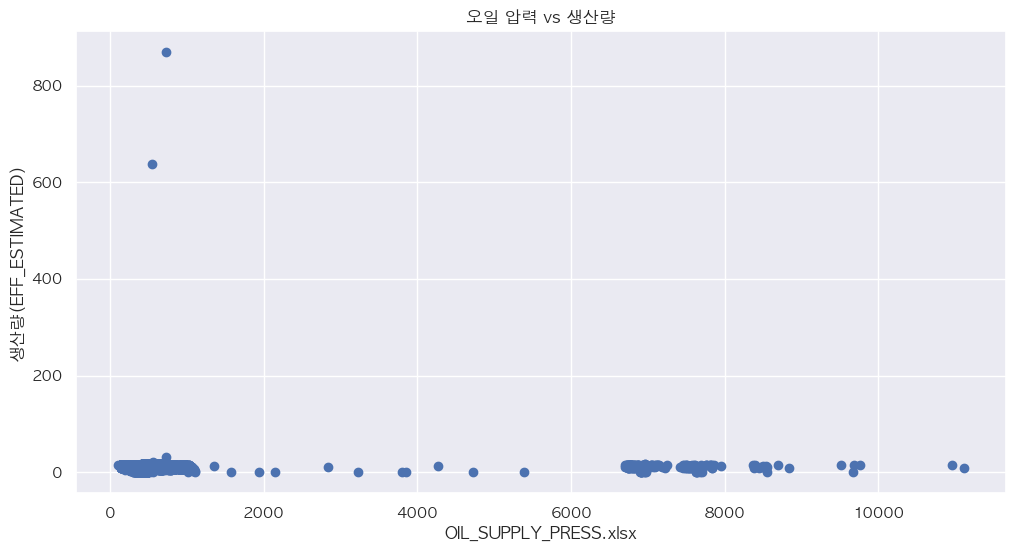

                       OIL_SUPPLY_PRESS.xlsx  EFF_ESTIMATED
OIL_SUPPLY_PRESS.xlsx               1.000000       0.073084
EFF_ESTIMATED                       0.073084       1.000000


In [32]:
import matplotlib.pyplot as plt

plt.scatter(df['OIL_SUPPLY_PRESS.xlsx'], df['EFF_ESTIMATED'])
plt.xlabel('OIL_SUPPLY_PRESS.xlsx')
plt.ylabel('생산량(EFF_ESTIMATED)')
plt.title('오일 압력 vs 생산량')
plt.show()

print(df[['OIL_SUPPLY_PRESS.xlsx', 'EFF_ESTIMATED']].corr())

<Axes: xlabel='PRESS_BIN'>

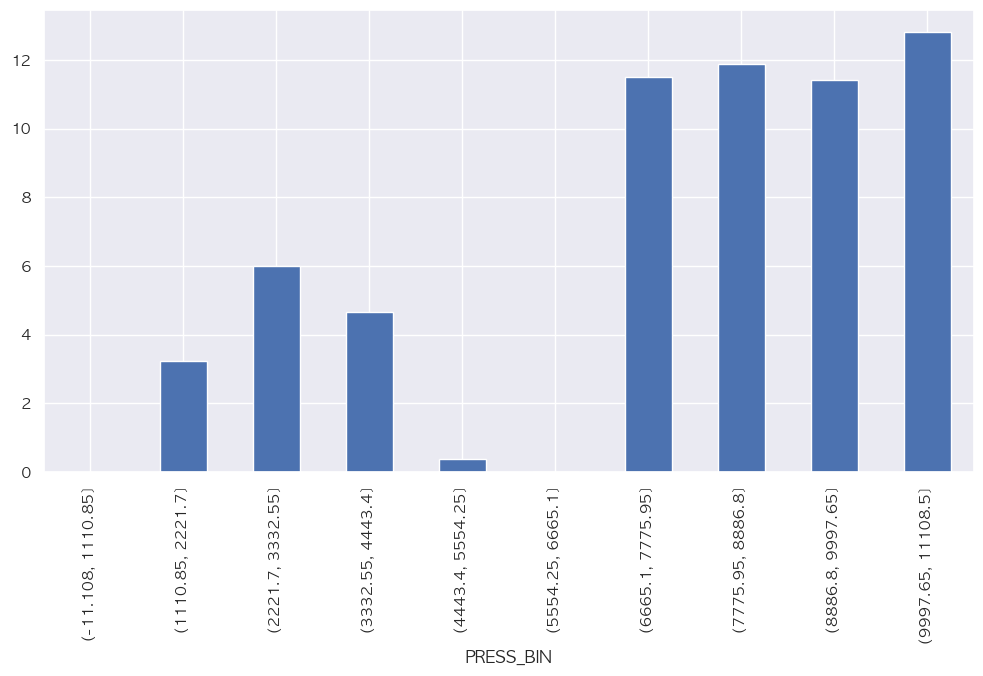

In [33]:
df['PRESS_BIN'] = pd.cut(df['OIL_SUPPLY_PRESS.xlsx'], bins=10)
df.groupby('PRESS_BIN')['EFF_ESTIMATED'].mean().plot(kind='bar')

최적 압력: 10323.05, 예상 최대 생산량: 63557.06


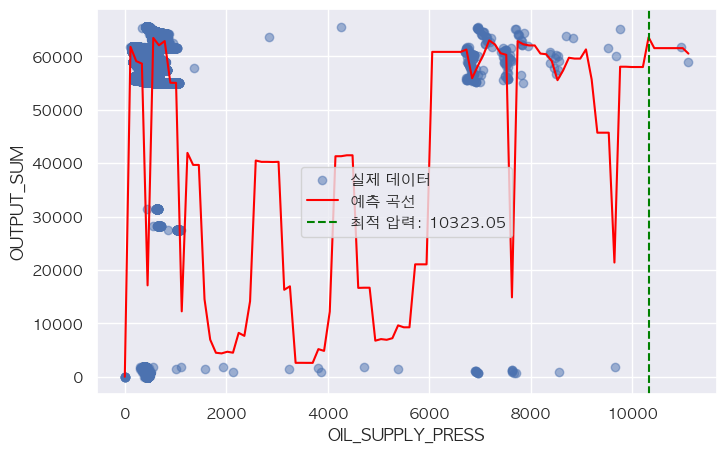

In [35]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# NaN 제거 (또는 채우기)
df_clean = df.dropna(subset=['OIL_SUPPLY_PRESS.xlsx', 'OUTPUT_COUNT_SUM.xlsx'])

# X, y 정의
X = df_clean[['OIL_SUPPLY_PRESS.xlsx']]
y = df_clean['OUTPUT_COUNT_SUM.xlsx']

# 모델 학습
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# 압력 범위 생성
press_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# 생산량 예측
predicted_output = model.predict(press_range)

# 최적 압력 찾기
max_idx = np.argmax(predicted_output)
optimal_press = press_range[max_idx][0]
max_output = predicted_output[max_idx]

print(f"최적 압력: {optimal_press:.2f}, 예상 최대 생산량: {max_output:.2f}")

# 그래프 시각화
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.5, label='실제 데이터')
plt.plot(press_range, predicted_output, color='red', label='예측 곡선')
plt.axvline(optimal_press, color='green', linestyle='--', label=f'최적 압력: {optimal_press:.2f}')
plt.xlabel('OIL_SUPPLY_PRESS')
plt.ylabel('OUTPUT_SUM')
plt.legend()
plt.show()

In [38]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 1. 데이터 준비
df = df[['OIL_SUPPLY_PRESS.xlsx', 'OUTPUT_COUNT_SUM.xlsx']].dropna()

# 2. 모델 학습
X = df[['OIL_SUPPLY_PRESS.xlsx']]
y = df['OUTPUT_COUNT_SUM.xlsx']
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# 3. 압력 구간 설정 (평균 ±10%)
mean_press = df['OIL_SUPPLY_PRESS.xlsx'].mean()
press_range = np.linspace(mean_press * 0.9, mean_press * 1.1, 100).reshape(-1, 1)

# 4. 시뮬레이션 예측
preds = model.predict(press_range)
optimal_idx = np.argmax(preds)
optimal_pressure = press_range[optimal_idx][0]
max_pred_output = preds[optimal_idx]

# 5. 향상률 계산
current_avg_output = y.mean()
improvement_rate = (max_pred_output - current_avg_output) / current_avg_output * 100

print(f"최적 압력: {optimal_pressure:.2f}")
print(f"예상 최대 생산량: {max_pred_output:.2f}")
print(f"현재 대비 향상률: {improvement_rate:.2f}%")

최적 압력: 453.26
예상 최대 생산량: 64874.85
현재 대비 향상률: 16.86%


import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def train_oil_press_model(df):
    # NaN 제거
    df_clean = df.dropna(subset=['OIL_SUPPLY_PRESS.xlsx', 'OUTPUT_COUNT_SUM.xlsx'])
    
    # X, y 정의
    X = df_clean[['OIL_SUPPLY_PRESS.xlsx']]
    y = df_clean['OUTPUT_COUNT_SUM.xlsx']
    
    # 모델 학습
    model = RandomForestRegressor(n_estimators=200, random_state=42)
    model.fit(X, y)
    
    return model

# 모델 학습 및 반환
rf_model = train_oil_press_model(df)

import joblib

joblib.dump(rf_model, 'rf_oil_press_model.pkl')

loaded_model = joblib.load('rf_oil_press_model.pkl')

In [ ]:
1/0==1

In [ ]:
# NaN 제거
df = df.dropna(subset=['OIL_SUPPLY_PRESS.xlsx', 'EFF_EST_2', 'METAL_TEMP_CONTROL.xlsx', 'OUTPUT_SUM'])

# 또는 NaN 채우기
# df = df.fillna(method='ffill')  # 이전 값으로 채움
# df = df.fillna(0)              # 0으로 채움

X = df[['OIL_SUPPLY_PRESS.xlsx', 'EFF_EST_2', 'METAL_TEMP_CONTROL.xlsx']]
y = df['OUTPUT_SUM']

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X, y)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 모델 학습
X = df[['OIL_SUPPLY_PRESS.xlsx', 'EFF_EST_2', 'METAL_TEMP_CONTROL.xlsx']]  # 예시
y = df['EFF_ESTIMATED']
model = RandomForestRegressor().fit(X, y)

# 압력 변화 시뮬레이션
press_range = np.linspace(df['OIL_SUPPLY_PRESS.xlsx'].min(), df['OIL_SUPPLY_PRESS.xlsx'].max(), 50)
preds = [model.predict([[p, df['EFF_EST_2'].mean(), df['METAL_TEMP_CONTROL.xlsx'].mean()]])[0] for p in press_range]

plt.plot(press_range, preds)
plt.xlabel('OIL_SUPPLY_PRESS')
plt.ylabel('예측 생산량')
plt.title('오일 압력 변화에 따른 생산량 예측')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

# 검증 데이터 DMatrix 생성 (이미 dval 변수 있음)
y_pred = model.predict(dval)

rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"검증 데이터 RMSE: {rmse:.3f}")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 준비 (이전과 동일)
features = [
    'EFF_ESTIMATED', 'EFF_EST_2', 'EFF_EST_1', 'EFF_EST_3',
    'METAL_TEMP_CONTROL.xlsx', 'METAL_TEMP_CUT.xlsx',
    'MAIN_MOTOR_ALM.xlsx', 'KO1_MOTOR_INVERTER_ALM.xlsx',
    'OIL_SUPPLY_PRESS.xlsx', 'TONGS_CAST_CURR.xlsx'
]
target = 'OUTPUT_COUNT_SUM.xlsx'

model_df = df[features + [target]].dropna()
X = model_df[features]
y = model_df[target]

# 학습용/검증용 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# DMatrix 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# 파라미터 설정
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'seed': 42,
    'verbosity': 1
}

# 모델 학습
evals = [(dtrain, 'train'), (dval, 'eval')]
model = xgb.train(params, dtrain, num_boost_round=100, early_stopping_rounds=10, evals=evals)

# 변수 중요도 출력
importance = model.get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': list(importance.keys()),
    'Importance': list(importance.values())
}).sort_values(by='Importance', ascending=False)

print("XGBoost 변수 중요도:")
print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance')
plt.show()